In [1]:
import pandas as pd
import re

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import pickle
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('datafix.csv', encoding='unicode_escape', sep=';')

In [3]:
df.head()

,ï»¿userName,content,score,at
0,Nurul Aini,klo gk ada data nya gk bisa di buka,2,31/01/2024 23:56
1,Salsa Bila,bagus,5,31/01/2024 23:50
2,JebolGamingYT,Aku beli pulsa. Beli paket data. Di proses ter...,1,31/01/2024 23:42
3,AREK BERBEK 1H,"Apa""an sekarang im3 error bkin ribet.pas beli ...",1,31/01/2024 23:38
4,Gian Dewi,good,5,31/01/2024 23:34


In [4]:
result = df.copy()

result_y = result.pop('score')
result_x = result.copy()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(result_x, result_y,
                                                    test_size=0.2, stratify=result_y, random_state=40)

In [6]:
X_train.head()

,ï»¿userName,content,at
979,Siti Aisah,oke,29/01/2024 04:35
5572,Rauqan R.r,"Jangan percaya mini games panjat kuota, mini g...",17/01/2024 17:32
2614,Era Fone,"tolong dong sinyal nya benerin,gangguan Mulu n...",26/01/2024 12:49
6580,Burhanudin,Wow keren bisa beli kuota lewat WhatsApp ??,14/01/2024 14:11
1862,Rudi,bisa masuk dulu aku download nggak bisa masuk ...,26/01/2024 15:28


In [7]:
X_train['score'] = y_train
df = X_train.copy()

In [8]:
#EXPORT TEST DATA (WITHOUT SCORE)
X_test.to_csv("data_test.csv", index = False)
#EXPORT TRAIN DATA
df.to_csv("data_train.csv", index = False)

## Cleaning

In [9]:
df.shape

(6780, 4)

In [10]:
df.isna().sum()

,0
ï»¿userName,0
content,0
at,0
score,0


In [11]:
df_filtered = df.copy()

In [12]:
df_filtered = df_filtered[df_filtered['content'] != ''] # Removing every entry where 'content' is null.

In [13]:
df_filtered.shape

(6780, 4)

In [14]:
def clean_content(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text) # Removing mentions
  text = re.sub(r'#\w+', '', text) # Removing hashtags
  text = re.sub(r'RT[\s]+', '', text) # Removing Retweets
  text = re.sub(r'https?://\S+', '', text) # Removing URLs
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # Removing alpha numerical characters

  return text

In [15]:
df_filtered['content'] = df_filtered['content'].apply(clean_content)

In [16]:
df_filtered.head()

,ï»¿userName,content,at,score
979,Siti Aisah,oke,29/01/2024 04:35,5
5572,Rauqan R.r,Jangan percaya mini games panjat kuota mini ga...,17/01/2024 17:32,1
2614,Era Fone,tolong dong sinyal nya beneringangguan Mulu ni...,26/01/2024 12:49,1
6580,Burhanudin,Wow keren bisa beli kuota lewat WhatsApp,14/01/2024 14:11,4
1862,Rudi,bisa masuk dulu aku download nggak bisa masuk ...,26/01/2024 15:28,5


## Case Folding

In [17]:
df_fold = df_filtered.copy()

In [18]:
df_fold['content'] = df_fold['content'].apply(lambda x: x.lower())

In [19]:
df_fold.head()

,ï»¿userName,content,at,score
979,Siti Aisah,oke,29/01/2024 04:35,5
5572,Rauqan R.r,jangan percaya mini games panjat kuota mini ga...,17/01/2024 17:32,1
2614,Era Fone,tolong dong sinyal nya beneringangguan mulu ni...,26/01/2024 12:49,1
6580,Burhanudin,wow keren bisa beli kuota lewat whatsapp,14/01/2024 14:11,4
1862,Rudi,bisa masuk dulu aku download nggak bisa masuk ...,26/01/2024 15:28,5


## Tokenize

In [20]:
df_token = df_fold.copy()

In [21]:
df_token['content'] = df_token['content'].apply(lambda x:x.split())

In [22]:
df_token.head()

,ï»¿userName,content,at,score
979,Siti Aisah,[oke],29/01/2024 04:35,5
5572,Rauqan R.r,"[jangan, percaya, mini, games, panjat, kuota, ...",17/01/2024 17:32,1
2614,Era Fone,"[tolong, dong, sinyal, nya, beneringangguan, m...",26/01/2024 12:49,1
6580,Burhanudin,"[wow, keren, bisa, beli, kuota, lewat, whatsapp]",14/01/2024 14:11,4
1862,Rudi,"[bisa, masuk, dulu, aku, download, nggak, bisa...",26/01/2024 15:28,5


## Normalization

In [24]:
import json

def read_dictionary_from_file(file_path):
  with open(file_path, 'r') as file:
    dictionary = json.load(file)
  return dictionary

# Example usage:
file_path = 'slangwords.txt'  # Path to the JSON file
my_dictionary = read_dictionary_from_file(file_path)

In [25]:
print(my_dictionary)

{'@': 'di', 'abis': 'habis', 'ad': 'ada', 'adlh': 'adalah', 'afaik': 'as far as i know', 'ahaha': 'haha', 'aj': 'saja', 'ajep ajep': 'dunia gemerlap', 'ak': 'saya', 'akika': 'aku', 'akkoh': 'aku', 'akuwh': 'aku', 'alay': 'norak', 'alow': 'halo', 'ambilin': 'ambilkan', 'ancur': 'hancur', 'anjrit': 'anjing', 'anter': 'antar', 'ap2': 'apa apa', 'apasih': 'apa sih', 'apes': 'sial', 'aps': 'apa', 'aq': 'saya', 'aquwh': 'aku', 'asbun': 'asal bunyi', 'aseekk': 'asyik', 'asekk': 'asyik', 'asem': 'asam', 'aspal': 'asli tetapi palsu', 'astul': 'asal tulis', 'ato': 'atau', 'au ah': 'tidak mau tahu', 'awak': 'saya', 'ay': 'sayang', 'ayank': 'sayang', 'b4': 'sebelum', 'bakalan': 'akan', 'bandes': 'bantuan desa', 'bangedh': 'banget', 'banpol': 'bantuan polisi', 'banpur': 'bantuan tempur', 'basbang': 'basi', 'bcanda': 'bercanda', 'bdg': 'bandung', 'begajulan': 'nakal', 'beliin': 'belikan', 'bencong': 'banci', 'bentar': 'sebentar', 'ber3': 'bertiga', 'beresin': 'membereskan', 'bete': 'bosan', 'beud': 

In [26]:
df_normal = df_token.copy()

In [27]:
def change(tokens):
  new_list = []
  for token in tokens:
    if token in my_dictionary:
      new_list.append(my_dictionary[token])
    else:
      new_list.append(token)
  return new_list

In [28]:
df_normal['content'] = df_normal['content'].apply(change)

In [29]:
df_normal.head()

,ï»¿userName,content,at,score
979,Siti Aisah,[oke],29/01/2024 04:35,5
5572,Rauqan R.r,"[jangan, percaya, mini, game, panjat, kuota, m...",17/01/2024 17:32,1
2614,Era Fone,"[tolong, dong, sinyal, nya, beneringangguan, m...",26/01/2024 12:49,1
6580,Burhanudin,"[wow, keren, bisa, beli, kuota, lewat, whatsapp]",14/01/2024 14:11,4
1862,Rudi,"[bisa, masuk, dulu, aku, unduh, tidak, bisa, m...",26/01/2024 15:28,5


## Stopword Removal

In [31]:
def import_words_from_file(file_path):
  word_list = []
  with open(file_path, 'r') as file:
    for line in file:
      word_list.append(line.strip())
  return word_list

file_path = 'stopwords.txt'
stopwords = import_words_from_file(file_path)
print(stopwords)

['adalah', 'adapun', 'agaknya', 'akan', 'akhir', 'akhirnya', 'akulah', 'amatlah', 'andalah', 'antara', 'apa', 'apabila', 'apalagi', 'artinya', 'asalkan', 'atau', 'ataupun', 'awalnya', 'bagaikan', 'bagaimanakah', 'bagi', 'bahkan', 'bahwasanya', 'bakal', 'balik', 'bapak', 'bawah', 'begini', 'beginikah', 'begitu', 'begitulah', 'bekerja', 'belakangan', 'belumlah', 'benarkah', 'berada', 'berakhirlah', 'berapa', 'berapalah', 'berarti', 'berbagai', 'beri', 'berikut', 'berjumlah', 'berkata', 'berkeinginan', 'berlainan', 'berlangsung', 'bermacam', 'bermaksud', 'bersama', 'bersiap', 'bertanya', 'berturut', 'bertutur', 'berupa', 'betul', 'biasa', 'bila', 'bisa', 'boleh', 'bolehlah', 'bukan', 'bukanlah', 'bulan', 'cara', 'cukup', 'cukuplah', 'dahulu', 'dan', 'dari', 'datang', 'demi', 'demikianlah', 'depan', 'dia', 'diakhirinya', 'diantara', 'diberi', 'diberikannya', 'dibuatnya', 'didatangkan', 'diibaratkan', 'diingat', 'diinginkan', 'dijelaskan', 'dikarenakan', 'dikatakannya', 'diketahui', 'dikira

In [32]:
def stopword_removal(tokens):
  new_list = []
  for token in tokens:
    if token not in stopwords:
      new_list.append(token)
  return new_list

In [33]:
df_sw = df_normal.copy()

In [34]:
df_sw['content'] = df_sw['content'].apply(stopword_removal)

In [35]:
df_sw.head()

,ï»¿userName,content,at,score
979,Siti Aisah,[oke],29/01/2024 04:35,5
5572,Rauqan R.r,"[percaya, mini, game, panjat, kuota, mini, gam...",17/01/2024 17:32,1
2614,Era Fone,"[sinyal, nya, beneringangguan, melulu, aneh]",26/01/2024 12:49,1
6580,Burhanudin,"[wow, keren, beli, kuota, whatsapp]",14/01/2024 14:11,4
1862,Rudi,"[masuk, unduh, tidak, masuk, downloadnya, iya,...",26/01/2024 15:28,5


In [36]:
print(stopwords)

['adalah', 'adapun', 'agaknya', 'akan', 'akhir', 'akhirnya', 'akulah', 'amatlah', 'andalah', 'antara', 'apa', 'apabila', 'apalagi', 'artinya', 'asalkan', 'atau', 'ataupun', 'awalnya', 'bagaikan', 'bagaimanakah', 'bagi', 'bahkan', 'bahwasanya', 'bakal', 'balik', 'bapak', 'bawah', 'begini', 'beginikah', 'begitu', 'begitulah', 'bekerja', 'belakangan', 'belumlah', 'benarkah', 'berada', 'berakhirlah', 'berapa', 'berapalah', 'berarti', 'berbagai', 'beri', 'berikut', 'berjumlah', 'berkata', 'berkeinginan', 'berlainan', 'berlangsung', 'bermacam', 'bermaksud', 'bersama', 'bersiap', 'bertanya', 'berturut', 'bertutur', 'berupa', 'betul', 'biasa', 'bila', 'bisa', 'boleh', 'bolehlah', 'bukan', 'bukanlah', 'bulan', 'cara', 'cukup', 'cukuplah', 'dahulu', 'dan', 'dari', 'datang', 'demi', 'demikianlah', 'depan', 'dia', 'diakhirinya', 'diantara', 'diberi', 'diberikannya', 'dibuatnya', 'didatangkan', 'diibaratkan', 'diingat', 'diinginkan', 'dijelaskan', 'dikarenakan', 'dikatakannya', 'diketahui', 'dikira

In [ ]:
# df_sw.to_csv("data_sw_fix.csv", index = False)

## Stemming

In [37]:
import pandas as pd

In [38]:
pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.6 MB/s eta 0:00:00


In [56]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [57]:
data_stem = df_sw.copy()

In [59]:
data_stem.iloc[70:77]

,ï»¿userName,content,at,score
7273,Leo Real,"[m3, tolol, sinyal, gak, apain, sinyalnya, lel...",12/01/2024 07:30,1
2098,Muhammad Nurhuda,"[troble, beli, paket, mahal, troble]",26/01/2024 13:51,1
4390,Anonymous User,"[kurangi, iya, tuan, bintangnya, habis, terbar...",21/01/2024 08:51,1
2345,Raihan Sptra2710,"[enda, masuk, jaringan, nya, jelek]",26/01/2024 13:26,1
6357,Supar Supar,"[4, bintang, kedepannya, aman, aman]",15/01/2024 09:35,4
7555,Hermansyah Ahmad,[ok],11/01/2024 11:51,5
2146,Yoga Gnwn,"[heran, bgttt, error, ngacooo]",26/01/2024 13:47,1


In [60]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(tokens):
  new_list = []
  for token in tokens:
    stemmed = stemmer.stem(token)
    new_list.append(stemmed)
  return new_list


data_stem['content'] = data_stem['content'].apply(stemming)

In [73]:
data_stem.iloc[70:77]

,ï»¿userName,content,at,score
7273,Leo Real,"[m3, tolol, sinyal, gak, apain, sinyal, lelet,...",12/01/2024 07:30,1
2098,Muhammad Nurhuda,"[troble, beli, paket, mahal, troble]",26/01/2024 13:51,1
4390,Anonymous User,"[kurang, iya, tuan, bintang, habis, baru, ribe...",21/01/2024 08:51,1
2345,Raihan Sptra2710,"[enda, masuk, jaring, nya, jelek]",26/01/2024 13:26,1
6357,Supar Supar,"[4, bintang, depan, aman, aman]",15/01/2024 09:35,4
7555,Hermansyah Ahmad,[ok],11/01/2024 11:51,5
2146,Yoga Gnwn,"[heran, bgttt, error, ngacooo]",26/01/2024 13:47,1


In [74]:
data_stem.head()


,ï»¿userName,content,at,score
979,Siti Aisah,[oke],29/01/2024 04:35,5
5572,Rauqan R.r,"[percaya, mini, game, panjat, kuota, mini, gam...",17/01/2024 17:32,1
2614,Era Fone,"[sinyal, nya, beneringangguan, melulu, aneh]",26/01/2024 12:49,1
6580,Burhanudin,"[wow, keren, beli, kuota, whatsapp]",14/01/2024 14:11,4
1862,Rudi,"[masuk, unduh, tidak, masuk, downloadnya, iya,...",26/01/2024 15:28,5


In [92]:
data_stem.to_csv("preprocessed_data.csv", index = False)

# **LABELING**

In [76]:
import pandas as pd

In [94]:
df_label = pd.read_csv('preprocessed_data.csv', encoding='unicode_escape')

In [95]:
print(df_label)

        Ã¯Â»Â¿userName                                            content  \
0           Siti Aisah                                            ['oke']   
1           Rauqan R.r  ['percaya', 'mini', 'game', 'panjat', 'kuota',...   
2             Era Fone  ['sinyal', 'nya', 'beneringangguan', 'melulu',...   
3           Burhanudin      ['wow', 'keren', 'beli', 'kuota', 'whatsapp']   
4                 Rudi  ['masuk', 'unduh', 'tidak', 'masuk', 'download...   
...                ...                                                ...   
6775   Muhammad Naufal  ['tidak', 'promo', 'nya', 'mahal', 'jelek', 'b...   
6776   Rizky Wulandari  ['jaring', 'jelek', 'dicikarang', 'kuota', 'ma...   
6777  Jordy Ardiansyah               ['tunggu', 'beli', 'kuota', 'gagal']   
6778          M RickyH  ['sinyal', 'jelek', 'jaring', 'error', 'baik',...   
6779     Beni Indrawan                                          ['bagus']   

                    at  score  
0     29/01/2024 04:35      5  
1     17/01

In [96]:
df_label.head()

,Ã¯Â»Â¿userName,content,at,score
0,Siti Aisah,['oke'],29/01/2024 04:35,5
1,Rauqan R.r,"['percaya', 'mini', 'game', 'panjat', 'kuota',...",17/01/2024 17:32,1
2,Era Fone,"['sinyal', 'nya', 'beneringangguan', 'melulu',...",26/01/2024 12:49,1
3,Burhanudin,"['wow', 'keren', 'beli', 'kuota', 'whatsapp']",14/01/2024 14:11,4
4,Rudi,"['masuk', 'unduh', 'tidak', 'masuk', 'download...",26/01/2024 15:28,5


In [97]:
score = []
for index, row in df_label.iterrows():
  if row["score"] <= 3:
    score.append(0)
  else:
    score.append(1)

# Menetapkan kolom 'score' dengan nilai yang dihasilkan
df_label['score'] = score

In [98]:
df_label.head()

,Ã¯Â»Â¿userName,content,at,score
0,Siti Aisah,['oke'],29/01/2024 04:35,1
1,Rauqan R.r,"['percaya', 'mini', 'game', 'panjat', 'kuota',...",17/01/2024 17:32,0
2,Era Fone,"['sinyal', 'nya', 'beneringangguan', 'melulu',...",26/01/2024 12:49,0
3,Burhanudin,"['wow', 'keren', 'beli', 'kuota', 'whatsapp']",14/01/2024 14:11,1
4,Rudi,"['masuk', 'unduh', 'tidak', 'masuk', 'download...",26/01/2024 15:28,1


In [99]:
df_label.to_csv("labeled_data.csv", index = False)

# VISUALIZATION

In [102]:
df_copy = pd.read_csv('labeled_data.csv', encoding='unicode_escape')

In [103]:
df_copy.head()

,ÃÂ¯ÃÂ»ÃÂ¿userName,content,at,score
0,Siti Aisah,['oke'],29/01/2024 04:35,1
1,Rauqan R.r,"['percaya', 'mini', 'game', 'panjat', 'kuota',...",17/01/2024 17:32,0
2,Era Fone,"['sinyal', 'nya', 'beneringangguan', 'melulu',...",26/01/2024 12:49,0
3,Burhanudin,"['wow', 'keren', 'beli', 'kuota', 'whatsapp']",14/01/2024 14:11,1
4,Rudi,"['masuk', 'unduh', 'tidak', 'masuk', 'download...",26/01/2024 15:28,1


In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud

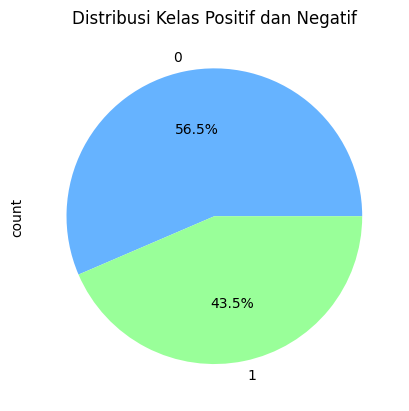

In [105]:
class_distribution = df_copy['score'].value_counts()
class_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
plt.title('Distribusi Kelas Positif dan Negatif')
plt.show()

In [106]:
train_s0 = df_copy[df_copy["score"] == 0]
train_s0.head()

,ÃÂ¯ÃÂ»ÃÂ¿userName,content,at,score
1,Rauqan R.r,"['percaya', 'mini', 'game', 'panjat', 'kuota',...",17/01/2024 17:32,0
2,Era Fone,"['sinyal', 'nya', 'beneringangguan', 'melulu',...",26/01/2024 12:49,0
5,Sanjaya 123,"['guna', 'kecewa', 'im3', 'sekarangawal', 'nya...",14/01/2024 04:20,0
7,Ibnu Noorfadila,"['indosat', 'tolol']",13/01/2024 03:53,0
8,Tegar Triyo Mustika Dani,"['kecewa', 'indosat', 'sekarangter', 'pasar', ...",19/01/2024 12:26,0


In [107]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

<ipython-input-108-d477375b3ba7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0['content'] = train_s0['content'].astype(str)


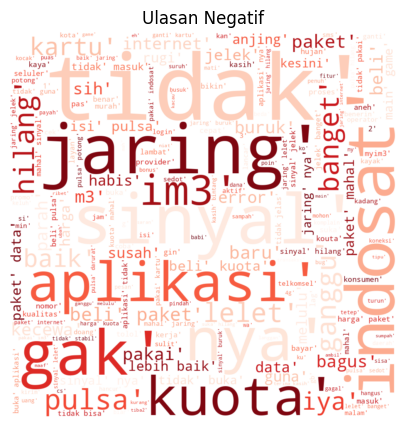

In [108]:
train_s0['content'] = train_s0['content'].astype(str)
all_text_s0 = ' '.join(word for word in train_s0["content"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ulasan Negatif")
plt.margins(x=0, y=0)
plt.show()

In [109]:
train_s1 = df_copy[df_copy["score"] == 1]
train_s1.head()

,ÃÂ¯ÃÂ»ÃÂ¿userName,content,at,score
0,Siti Aisah,['oke'],29/01/2024 04:35,1
3,Burhanudin,"['wow', 'keren', 'beli', 'kuota', 'whatsapp']",14/01/2024 14:11,1
4,Rudi,"['masuk', 'unduh', 'tidak', 'masuk', 'download...",26/01/2024 15:28,1
6,Epi Ana,['bagus'],28/01/2024 14:09,1
9,Miswati Wati,"['foto', 'w']",26/01/2024 19:13,1


<ipython-input-110-97ff8582350f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1['content'] = train_s1['content'].astype(str)


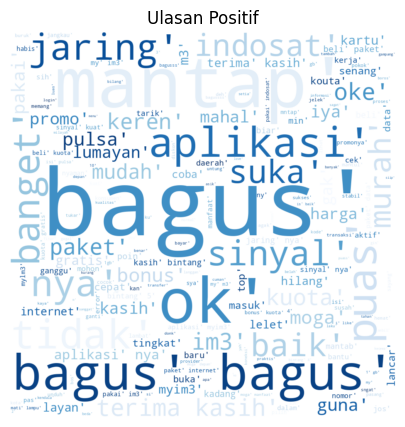

In [110]:
train_s1['content'] = train_s1['content'].astype(str)
all_text_s1 = ' '.join(word for word in train_s1["content"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

<ipython-input-111-d09ef6ecfceb>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sentimen_data = pd.value_counts(df_copy["score"], sort=True)


<function matplotlib.pyplot.show(close=None, block=None)>

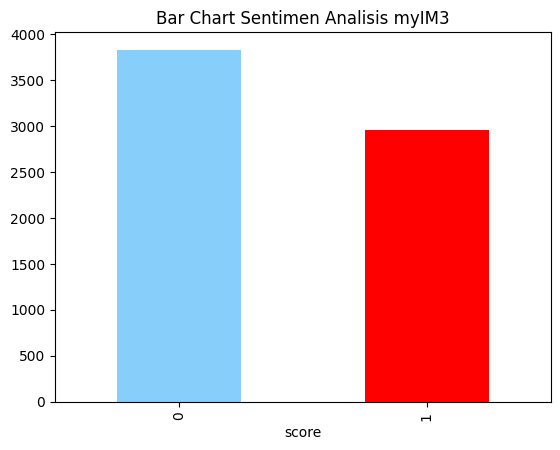

In [111]:
sentimen_data = pd.value_counts(df_copy["score"], sort=True)
sentimen_data.plot(kind='bar', color=['lightskyblue', 'red'])
plt.title("Bar Chart Sentimen Analisis myIM3")
plt.show

# MACHINE LEARNING


In [112]:
import pandas as pd

In [116]:
df_train = pd.read_csv('labeled_data.csv', encoding='unicode_escape')

In [117]:
df_train.head()

,ÃÂ¯ÃÂ»ÃÂ¿userName,content,at,score
0,Siti Aisah,['oke'],29/01/2024 04:35,1
1,Rauqan R.r,"['percaya', 'mini', 'game', 'panjat', 'kuota',...",17/01/2024 17:32,0
2,Era Fone,"['sinyal', 'nya', 'beneringangguan', 'melulu',...",26/01/2024 12:49,0
3,Burhanudin,"['wow', 'keren', 'beli', 'kuota', 'whatsapp']",14/01/2024 14:11,1
4,Rudi,"['masuk', 'unduh', 'tidak', 'masuk', 'download...",26/01/2024 15:28,1


## TF-IDF

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [119]:
vectorizer = TfidfVectorizer()

In [120]:
df_train['content'] = df_train['content'].astype(str)
X = df_train['content'].sum()
print(X)

['oke']['percaya', 'mini', 'game', 'panjat', 'kuota', 'mini', 'game', 'scam', 'lihat', 'iklan']['sinyal', 'nya', 'beneringangguan', 'melulu', 'aneh']['wow', 'keren', 'beli', 'kuota', 'whatsapp']['masuk', 'unduh', 'tidak', 'masuk', 'downloadnya', 'iya', 'agak', 'sih']['guna', 'kecewa', 'im3', 'sekarangawal', 'nya', 'isi', 'pulsa', 'promonya', 'murah', 'eehh', 'selesai', 'isi', 'pulsa', 'promonya', 'drastis', 'banget']['bagus']['indosat', 'tolol']['kecewa', 'indosat', 'sekarangter', 'pasar', 'laku', 'bayar', 'dompet', 'digital', 'bug']['foto', 'w']['aplikasiy', 'bagus'][]['paraaahbanget', 'cumagara2', 'baru', 'poin', '30000', 'an', 'hilangjadi', 'ngulang', 'awal', 'parah', 'banget', 'sampahudah', 'kuota', 'mahalmending', 'beli', 'beda', '8k', 'banget', 'selisihnyaga', 'tidak', 'poinpercuma', 'cape2', 'ngumpulin', 'hilang', 'poin', 'nya']['tidak', 'niat', 'masang', 'jaring', 'internet', 'bahodopi', 'sulawesi', 'lebih baik', 'tidak', 'pasah', 'payah', 'lelet']['bagus', 'puas']['kouta', 'sa

In [121]:
vectorizer.fit([X])

TfidfVectorizer()

In [122]:
tfidf_features = vectorizer.transform(df_train['content'])

In [123]:
tfidf_features.dtype

dtype('float64')

In [124]:
print(tfidf_features)

  (0, 4392)	1.0
  (1, 5173)	0.2672612419124244
  (1, 4649)	0.2672612419124244
  (1, 4533)	0.2672612419124244
  (1, 3888)	0.5345224838248488
  (1, 3472)	0.2672612419124244
  (1, 3245)	0.2672612419124244
  (1, 2422)	0.2672612419124244
  (1, 2002)	0.5345224838248488
  (2, 5422)	0.4472135954999579
  (2, 4314)	0.4472135954999579
  (2, 3791)	0.4472135954999579
  (2, 1013)	0.4472135954999579
  (2, 586)	0.4472135954999579
  (3, 6181)	0.4472135954999579
  (3, 6145)	0.4472135954999579
  (3, 3245)	0.4472135954999579
  (3, 3019)	0.4472135954999579
  (3, 986)	0.4472135954999579
  (4, 6054)	0.31622776601683794
  (4, 5848)	0.31622776601683794
  (4, 5385)	0.31622776601683794
  (4, 3740)	0.6324555320336759
  (4, 2615)	0.31622776601683794
  (4, 1779)	0.31622776601683794
  :	:
  (6776, 4984)	0.25
  (6776, 4497)	0.25
  (6776, 3588)	0.25
  (6776, 3245)	0.25
  (6776, 2970)	0.25
  (6776, 2741)	0.25
  (6776, 2672)	0.25
  (6776, 1635)	0.25
  (6776, 1264)	0.25
  (6776, 994)	0.25
  (6776, 865)	0.5
  (6776, 674)	

##Gaussian Naive-Bayes

In [125]:
import numpy as np


In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

In [127]:
fold_wise_results = []

def custom_scoring(model, X, y):
  y_pred = model.predict(X)
  cm = confusion_matrix(y, y_pred)
  accuracy = accuracy_score(y, y_pred)
  fold_wise_results.append(cm)
  return accuracy

In [128]:
model = GaussianNB()

In [129]:
tfidf_features_dense = tfidf_features.toarray()

In [130]:
param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}

In [131]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [132]:
grid_search.fit(tfidf_features_dense, df_train['score'])

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [133]:
print(grid_search.best_estimator_)
print(grid_search.best_score_)

GaussianNB(var_smoothing=0.008111308307896872)
0.805457227138643


In [134]:
model2 = GaussianNB(var_smoothing = 0.008111308307896872)

In [135]:
scores = cross_val_score(model2, tfidf_features_dense, df_train['score'], cv=5, scoring=custom_scoring)

In [136]:
print(scores)

[0.80088496 0.81415929 0.81268437 0.80088496 0.79867257]


In [137]:
for i in range(5):
  cm = fold_wise_results[i]

  # Extract TP, FP, TN, FN from the confusion matrix (example)
  TP = cm[1, 1]  # True Positives (assuming class 1 is the positive class)
  FP = cm[0, 1]  # False Positives
  TN = cm[0, 0]  # True Negatives
  FN = cm[1, 0]  # False Negatives

  accuracy = scores[i]
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  f1_score = 2 * (precision * recall)/(precision + recall)

  # Print or analyze these values for each fold as needed
  print(f"Confusion Matrix:\n{cm}")
  print(f"True Positives: {TP}")
  print(f"False Positives: {FP}")
  print(f"True Negatives: {TN}")
  print(f"False Negatives: {FN}")
  print(f"Accuracy: {accuracy}")
  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print(f"F1-Score: {f1_score}")
  print("-" * 50)  # Separator for better readability between folds

Confusion Matrix:
[[530 235]
 [ 35 556]]
True Positives: 556
False Positives: 235
True Negatives: 530
False Negatives: 35
Accuracy: 0.8008849557522124
Precision: 0.7029077117572693
Recall: 0.9407783417935702
F1-Score: 0.8046309696092621
--------------------------------------------------
Confusion Matrix:
[[554 211]
 [ 41 550]]
True Positives: 550
False Positives: 211
True Negatives: 554
False Negatives: 41
Accuracy: 0.8141592920353983
Precision: 0.7227332457293035
Recall: 0.9306260575296108
F1-Score: 0.8136094674556212
--------------------------------------------------
Confusion Matrix:
[[546 220]
 [ 34 556]]
True Positives: 556
False Positives: 220
True Negatives: 546
False Negatives: 34
Accuracy: 0.8126843657817109
Precision: 0.7164948453608248
Recall: 0.9423728813559322
F1-Score: 0.8140556368960469
--------------------------------------------------
Confusion Matrix:
[[539 227]
 [ 43 547]]
True Positives: 547
False Positives: 227
True Negatives: 539
False Negatives: 43
Accuracy: 0.80

## Pickle

In [138]:
testmodel = GaussianNB(var_smoothing = 0.008111308307896872)

In [139]:
print(grid_search.best_estimator_)

GaussianNB(var_smoothing=0.008111308307896872)


In [140]:
df_train.head()

,ÃÂ¯ÃÂ»ÃÂ¿userName,content,at,score
0,Siti Aisah,['oke'],29/01/2024 04:35,1
1,Rauqan R.r,"['percaya', 'mini', 'game', 'panjat', 'kuota',...",17/01/2024 17:32,0
2,Era Fone,"['sinyal', 'nya', 'beneringangguan', 'melulu',...",26/01/2024 12:49,0
3,Burhanudin,"['wow', 'keren', 'beli', 'kuota', 'whatsapp']",14/01/2024 14:11,1
4,Rudi,"['masuk', 'unduh', 'tidak', 'masuk', 'download...",26/01/2024 15:28,1


In [141]:
x = tfidf_features_dense
y = df_train['score']

In [142]:
testmodel.fit(x, y)

GaussianNB(var_smoothing=0.008111308307896872)

In [143]:
with open('model.pkl', 'wb') as file:
    pickle.dump(testmodel, file)

In [144]:
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

## Export Stuff

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Confusion Matrix:
# [[536 229]
#  [ 42 549]]
# True Positives: 549
# False Positives: 229
# True Negatives: 536
# False Negatives: 42
# Accuracy: 0.8141592920353983
# Precision: 0.705655526992288
# Recall: 0.9289340101522843
# F1-Score: 0.802045288531775

In [147]:
data = [[536, 229], [42, 549]]
conf_matrix = pd.DataFrame(data)
conf_matrix.columns = ['Negative', 'Positive']
conf_matrix.index = ['Negative', 'Positive']

In [148]:
conf_matrix

,Negative,Positive
Negative,536,229
Positive,42,549


In [ ]:
conf_matrix.to_csv('confusion_matrix.csv')

In [149]:
data = [[0.8141592920353983, 0.705655526992288, 0.9289340101522843, 0.802045288531775]]
res2 = pd.DataFrame(data)
res2.columns = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

In [150]:
res2.head()

,Accuracy,Precision,Recall,F1-Score
0,0.814159,0.705656,0.928934,0.802045


In [ ]:
res2.to_csv('model_results.csv', index=False)

In [ ]:
test = pd.read_csv('confusion_matrix.csv', index_col=0)

In [ ]:
test.head()